## **1.1** Task 1: A first CA Model

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [2]:
class TrafficSimulation:
    def __init__(self, length, v_max, density):
        self.length = length
        self.density = density
        self.v_max = v_max
        self.road = [-1] * length
    
        # Randomly place cars on the road according to density
        num_cars = int(length * density)
        # print('Initial Road:', length, density, num_cars)
        positions = random.sample(range(length), num_cars)
        for pos in positions:
            self.road[pos] = random.randint(0, self.v_max)
        # self.display(self.road)
    
    def display(self, road):
        for cell in road:
            if cell == -1:
                print('.', end=' ')
            else:
                print(cell, end=' ')
        print()

    def get_road(self):
        return self.road
    
    # Algorithm 8.1 Implementation
    def update_1(self):
        updated_road = [-1] * self.length

        for i in range(self.length):
            if self.road[i] == -1: continue

            steps = self.road[i]

            # Accelerate
            steps = min(steps + 1, self.v_max)

            # Decelerate
            distance = 1
            while self.road[(i + distance) % self.length] == -1:
                distance += 1

            steps = min(steps, distance - 1)

            # Move
            updated_road[(i + steps) % self.length] = steps
        
        self.road = updated_road
        return self.road
    


    # Algorithm 8.2 Implementation
    def update_2(self, p):
        updated_road = [-1] * self.length

        for i in range(self.length):
            if self.road[i] == -1: continue

            steps = self.road[i]

            # Accelerate
            steps = min(steps + 1, self.v_max)

            # Decelerate
            distance = 1
            while self.road[(i + distance) % self.length] == -1:
                distance += 1

            steps = min(steps, distance - 1)

            # Randomize
            steps = max(steps - 1, 0) if random.random() < p else steps

            # Move
            updated_road[(i + steps) % self.length] = steps
        
        self.road = updated_road
        return self.road
                

### Run Simulations

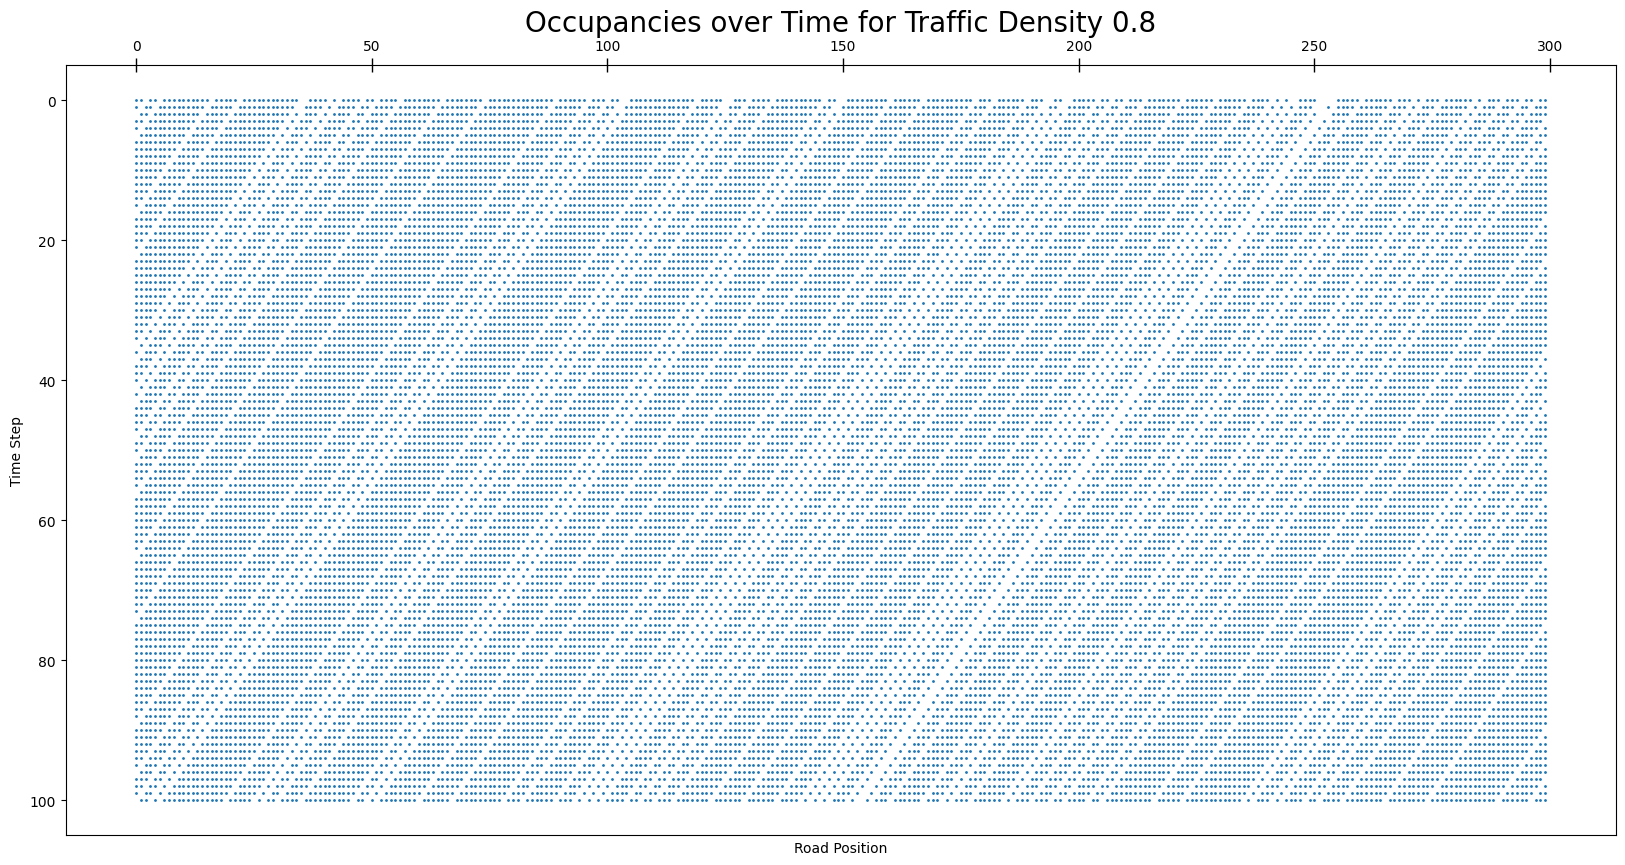

In [3]:
# Task 1: A first CA model
def simulate_traffic_1(length, vmax, density, num_steps):
    occupancies_over_time = []
    
    sim = TrafficSimulation(length, vmax, density)
    occupancies_over_time.append(np.array(sim.get_road()))
    
    for t in range(num_steps):
        sim.update_1()
        occupancies_over_time.append(np.array(sim.get_road()))
    
    return occupancies_over_time

# Parameters
length = 300  # Length of the road
vmax = 5  # Maximum velocity
num_steps = 100  # Number of time steps
density = 0.8 # [0.1, 0.25, 0.5, 0.8]  # Traffic densities

# Plotting
plt.figure(figsize=(20, 10))

indices = []
occupancies_over_time = np.array(simulate_traffic_1(length, vmax, density, num_steps))

for i in range(len(occupancies_over_time)):
    for j in range(len(occupancies_over_time[i])):
        if occupancies_over_time[i][j] != -1:
            indices.append((i, j))

# Extract x and y coordinates
x_coords = [index[1] for index in indices]
y_coords = [index[0] for index in indices]
plt.scatter(x_coords, y_coords, s=1)

plt.title(f'Occupancies over Time for Traffic Density {density}', fontsize=20)
plt.xlabel('Road Position')
plt.ylabel('Time Step')


# Remove ticks from the bottom
plt.gca().invert_yaxis()
plt.tick_params(axis='x', which='both', top=True, bottom=False, labelbottom=False, direction='inout', length=10, width=1, colors='black', labeltop=True)
plt.show()


## **1.2** Task 2: Stochastic behavior

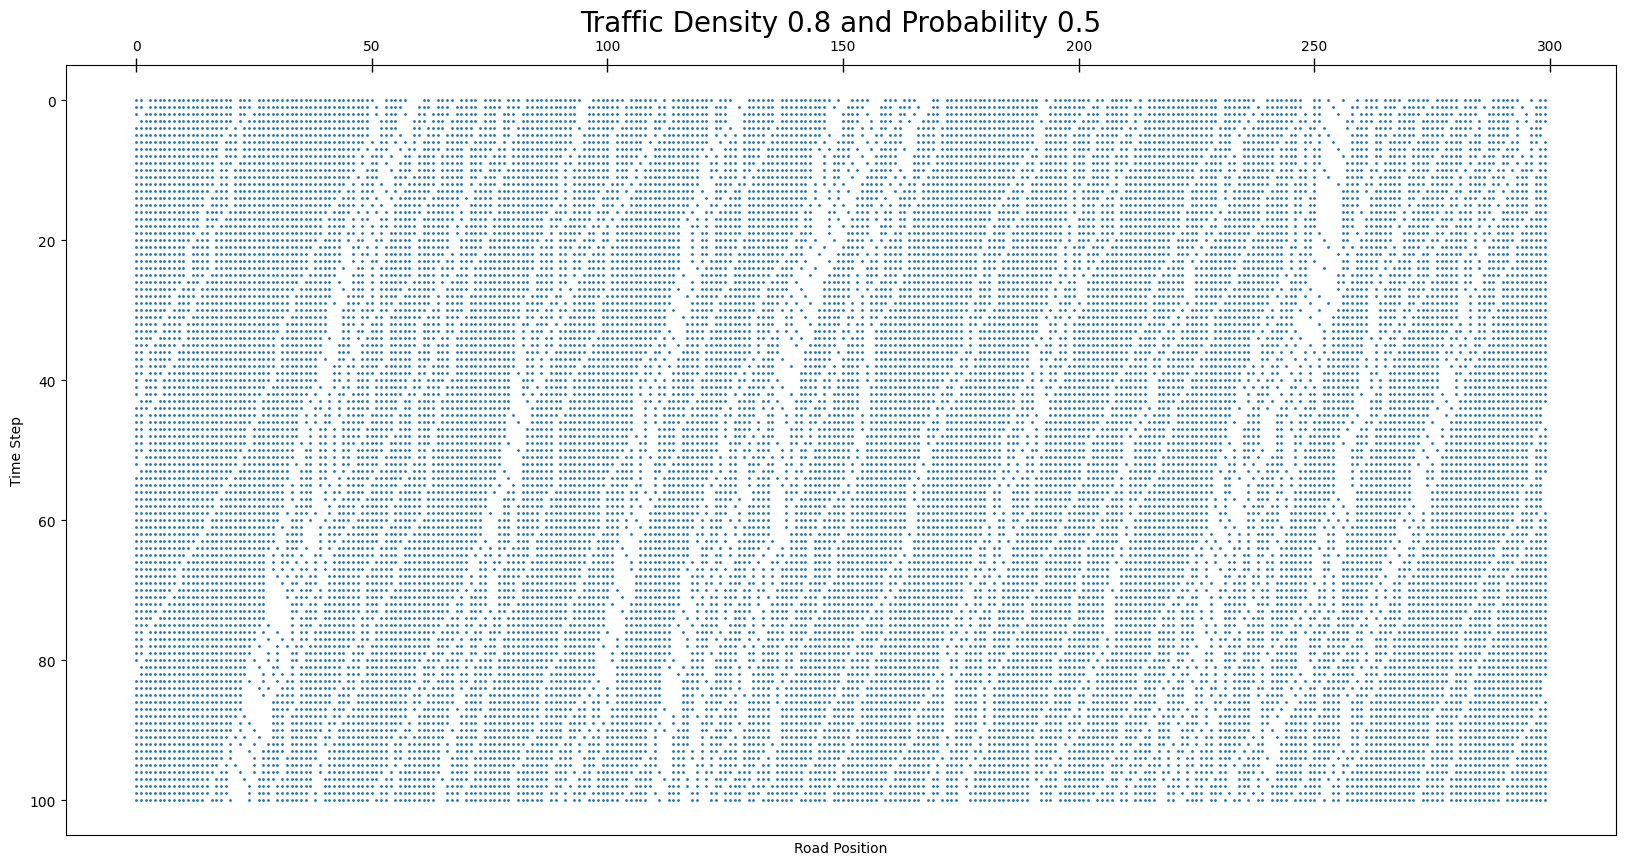

In [4]:
# Task 2: Stochastic behavior
def simulate_traffic_2(length, vmax, density, num_steps, p):
    occupancies_over_time = []
    
    sim = TrafficSimulation(length, vmax, density)
    occupancies_over_time.append(np.array(sim.get_road()))
    
    for t in range(num_steps):
        sim.update_2(p)
        occupancies_over_time.append(np.array(sim.get_road()))
    
    return occupancies_over_time

# Parameters
length = 300  # Length of the road
vmax = 5  # Maximum velocity
num_steps = 100  # Number of time steps
density = 0.8 # [0.1, 0.25, 0.5, 0.8]  # Traffic densities
p = 0.5 # [0.1, 0.2, 0.5] # Randomization proability

# Plotting
plt.figure(figsize=(20, 10))

indices = []
occupancies_over_time = np.array(simulate_traffic_2(length, vmax, density, num_steps, p))

for i in range(len(occupancies_over_time)):
    for j in range(len(occupancies_over_time[i])):
        if occupancies_over_time[i][j] != -1:
            indices.append((i, j))

# Extract x and y coordinates
x_coords = [index[1] for index in indices]
y_coords = [index[0] for index in indices]

plt.scatter(x_coords, y_coords, s=1)

plt.title(f'Traffic Density {density} and Probability {p}', fontsize=20)
plt.xlabel('Road Position')
plt.ylabel('Time Step')


# Remove ticks from the bottom
plt.gca().invert_yaxis()
plt.tick_params(axis='x', which='both', top=True, bottom=False, labelbottom=False, direction='inout', length=10, width=1, colors='black', labeltop=True)
plt.show()


## 1.3 Fundamental diagrams

A fundamental diagram displays the relationship between traffic flow and traffic density. Fundamental diagrams are useful in the context of modeling traffic flow, as it represents the relationship between the flow of traffic and the density of traffic. To create a fundamental diagram of actual road traffic, fundamental diagram points need to be recorded with measurements that cover different traffic situations. To determine the flow of traffic, we would need to measure the number of vehicles that pass a point (or, a measuring station) during a certain time interval. 

Practically speaking, measuring the density for a fundamental diagram is a bit more complex in the real world. We’d need to determine the number of vehicles on a section of the road of a specified length at a point in time of the measurement. This can be achieved by taking photographs and either manually or automatically counting vehicles. An alternative approach is to determine the number of vehicles entering and leaving a road - if the road has been empty at the beginning, the number of vehicles can be computed and the local density can be approximated. This approach can be useful for a simulation.

The fundamental diagram is usually represented with a scatter plot (like in the provided reading) to compare
density with flow of traffic. Generally speaking, we can divide up a fundamental diagram into regions that
represent the following:
- Free flow: traffic density is low, allowing vehicles to travel at their desired speeds; flow increases
linearly with density, and speed of vehicles stays relatively constant.
- Congested flow: As density increases, the space between vehicles decreases, causing them to change
their speed for aversion and safety purposes; flow reaches its maximum capacity, and the speed begins
to decrease.
- Jammed flow: When the density becomes too great, the flow will decrease, causing slow speeds or
full stops for vehicles; the road becomes highly congested, and the speed will drop.

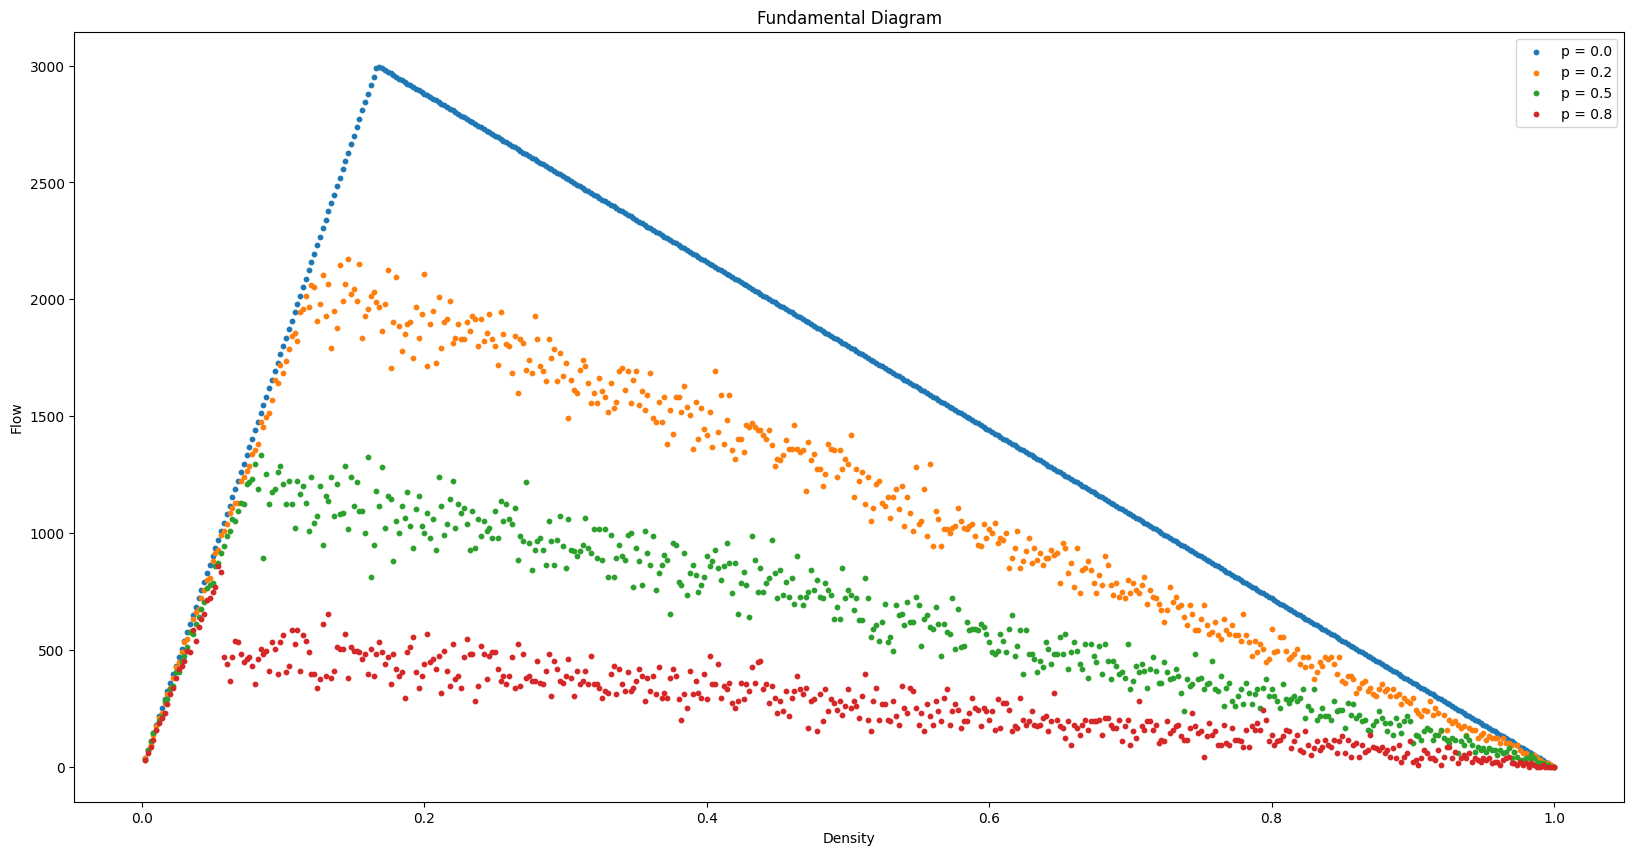

In [5]:
class RoadSim:
    def __init__(self, length, num_cars, v_max, p):
        self.length = length
        self.num_cars = num_cars
        self.v_max = v_max
        self.p = p
        self.reset()

    def reset(self):
        self.road = [-1] * self.length
        for i in range(self.num_cars):
            position = i * (self.length // self.num_cars)
            self.road[position] = self.v_max

    def update(self):
        updated_road = [-1] * self.length
        for i in range(self.length):
            if self.road[i] == -1:
                continue
            steps = self.road[i]
            # Accelerate
            steps = min(steps + 1, self.v_max)
            # Decelerate
            distance = 1
            while self.road[(i + distance) % self.length] == -1:
                distance += 1
            steps = min(steps, distance - 1)
            # Randomize
            steps = max(steps - 1, 0) if random.random() < self.p else steps
            # Move
            updated_road[(i + steps) % self.length] = steps
        self.road = updated_road
        # self.display()
        return self.road

    def get_flow(self):
        flow = sum(v for v in self.road if v != -1) / self.length
        return flow * 3600

def generate_fundamental_diagram(length, v_max, p_vals, num_cars_range):
    plt.figure(figsize=(20, 10))

    for p in p_vals:
        densities = []
        flows = []

        for num_cars in num_cars_range:
            sim = RoadSim(length, num_cars, v_max, p)
            for _ in range(1000):  # Run the simulation for 1000 timesteps
                sim.update()
            density = num_cars / length

            flow = sim.get_flow()
            densities.append(density)
            flows.append(flow)

        plt.scatter(densities, flows, s=10, marker='o', label=f'p = {p}')

    plt.xlabel('Density')
    plt.ylabel('Flow')
    plt.title('Fundamental Diagram')
    plt.legend()
    plt.show()

# Example usage
length = 500
v_max = 5
p_vals = [0.0, 0.2, 0.5, 0.8]
num_cars_range = range(1, length + 1)
generate_fundamental_diagram(length, v_max, p_vals, num_cars_range)

## 1.4 Initial Testing / Thoughts

Things we need to incorporate: acceleration / deceleration, lane inertia, 'cautious' lane changes

### Algorithm Steps:
**Inputs**: Length of road (`length`), maximum speed in left lane (`vL`), maximum speed in right lane (`vR`), traffic density (`density`), randomization probability (`p`)

1. Initialize a two-dimensional array `road` with `length` and 2 lanes, filling with -1 for empty cells.
2. Randomly distribute cars with initial speeds on both lanes according to `density`.
3. For each time step `t` in the simulation:
    1. For each car in each lane:
        1. **Acceleration**: Increase speed by 1, not exceeding `vL` or `vR` respective to their lane.
        2. **Lane Inertia**: If at maximum speed, stay in the lane.
        3. **Cautious Lane Changes**: 
            1. If deceleration is required, check adjacent lane for a safe lane change. Safe lane change is possible if:
                - There's no car in the target space in the adjacent lane.
                - The next car in the adjacent lane is farther than the current speed of our car.
                - The car behind in the adjacent lane is far enough that if it accelerates, it won't reach our car's new position.
        4. **Deceleration**: If a lane change is not possible, decrease speed to avoid a collision in the current lane.
    2. Update the positions of all cars based on their new speeds.
4. End simulation after `num_steps`.

### Summary:
In a two-lane traffic model, cars want to go as fast as possible without crashing. Each car will speed up if it can. Cars prefer to stay in their lane and go up to the maximum allowed speed for that lane. If they're going to hit the car in front of them, they'll check if it's safe to switch to the other lane. If they can't switch safely, they slow down just enough to avoid a crash.

In [10]:
class TwoLaneTrafficSimulation:
    def __init__(self, length, vL, vR, density):
        '''
        Initialize the two-lane traffic simulation
        with the given parameters. Cars are randomly
        placed in each lane according to the density.

        length: Length of the road
        vL: Maximum velocity for the left lane
        vR: Maximum velocity for the right lane
        density: Traffic density
        '''

        self.length = length
        self.density = density
        self.vL = vL
        self.vR = vR
        self.road = np.full((2, length), -1)
        
        num_cars = int(length * density)
        for lane in range(2):
            positions = random.sample(range(length), num_cars // 2)  
            speeds = np.random.randint(0, self.vR+1, size=num_cars // 2) if lane == 1 else np.random.randint(0, self.vL+1, size=num_cars // 2)
            for pos, speed in zip(positions, speeds):
                self.road[lane, pos] = speed

    def display(self):
        '''
        Display the current state of the road
        with cars represented by their speeds.
        '''
        for lane in range(2):
            print(''.join('.' if x == -1 else str(x) for x in self.road[lane]))

    def run_simulation_with_plot(self, num_steps, p):
        '''
        Function to run the simulation for the given
        number of steps and display the road state
        over time. The plot shows the road with cars
        represented by their speeds. Note that the
        number of steps is multiplied by 2 to make
        space in the plot for both lanes in the 
        simulation.

        num_steps: Number of time steps to simulate
        p: Randomization probability for dallying
        '''
        plt.figure(figsize=(20, 10))

        # invisible plots to show the legend
        plt.scatter([], [], c='blue', label='Left', s=1)
        plt.scatter([], [], c='red', label='Right', s=1)

        for step in range(num_steps):
            self.update(p)
            for lane in range(2):
                for position, speed in enumerate(self.road[lane]):
                    if speed != -1:
                        # Multiply step by 2 to make space for two lanes
                        y_pos = step * 2 + lane  
                        plt.scatter(position, y_pos, c='blue' if lane == 0 else 'red', s=1)

        plt.title('Two-Lane Traffic Simulation - Density {:.2f}, Dally Factor {:.2f}, vL {:.2f}, vR {:.2f}'.format(self.density, p, self.vL, self.vR))
        plt.xlabel('Road Position')
        plt.ylabel('Step and Lane')
        plt.legend(title="Lanes", loc='upper right')
        plt.gca().invert_yaxis()
        plt.show()
    
    def update(self, p):
        '''
        Update the road state according to pre-determined
        rules. The update is done for both lanes in parallel.

        p: Randomization probability for dallying
        '''
        
        # Update lanes starting from the furthest car to prevent overwriting cars that haven't moved yet
        for lane in range(2):
            for i in sorted(np.where(self.road[lane, :] != -1)[0], reverse=True):
                v_max = self.vL if lane == 0 else self.vR
                v = self.road[lane, i]
                
                # Acceleration
                v = min(v + 1, v_max)
                
                # Deceleration
                d = 1
                while self.road[lane, (i + d) % self.length] == -1 and d <= v:
                    d += 1
                v = min(v, d - 1)
                
                # Randomization
                if random.random() < p:
                    v = max(v - 1, 0)
                
                # Lane Changes
                if v < self.road[lane, i] and lane == 0:  # Consider changing from left to right
                    if self._safe_to_change_lane(i, 1, v):
                        self.road[0, i] = -1
                        self.road[1, i] = v
                        continue
                elif v < self.road[lane, i] and lane == 1:  # Consider changing from right to left
                    if self._safe_to_change_lane(i, 0, v):
                        self.road[1, i] = -1
                        self.road[0, i] = v
                        continue
                
                # Movement
                self.road[lane, i] = -1
                self.road[lane, (i + v) % self.length] = v

    def _safe_to_change_lane(self, position, target_lane, speed):
        '''
        Helper method to check if it is safe to change lanes
        for a car at the given position and speed.

        position: Current position of the car
        target_lane: Lane to change to
        speed: Current speed of the car
        '''
        
        # Check for safety in the target lane before changing lanes
        # Check for the next car in the target lane
        for step in range(1, speed + 1):
            if self.road[target_lane, (position + step) % self.length] != -1:
                return False  # Unsafe to change lanes
        # Check for the car behind in the target lane
        step = 1
        while self.road[target_lane, (position - step) % self.length] == -1 and step < self.length:
            step += 1
        # Unsafe to change lanes, as the car behind might crash into us
        if step < self.length and self.road[target_lane, (position - step) % self.length] + step >= speed:
            return False  
        return True  # Safe to change lanes

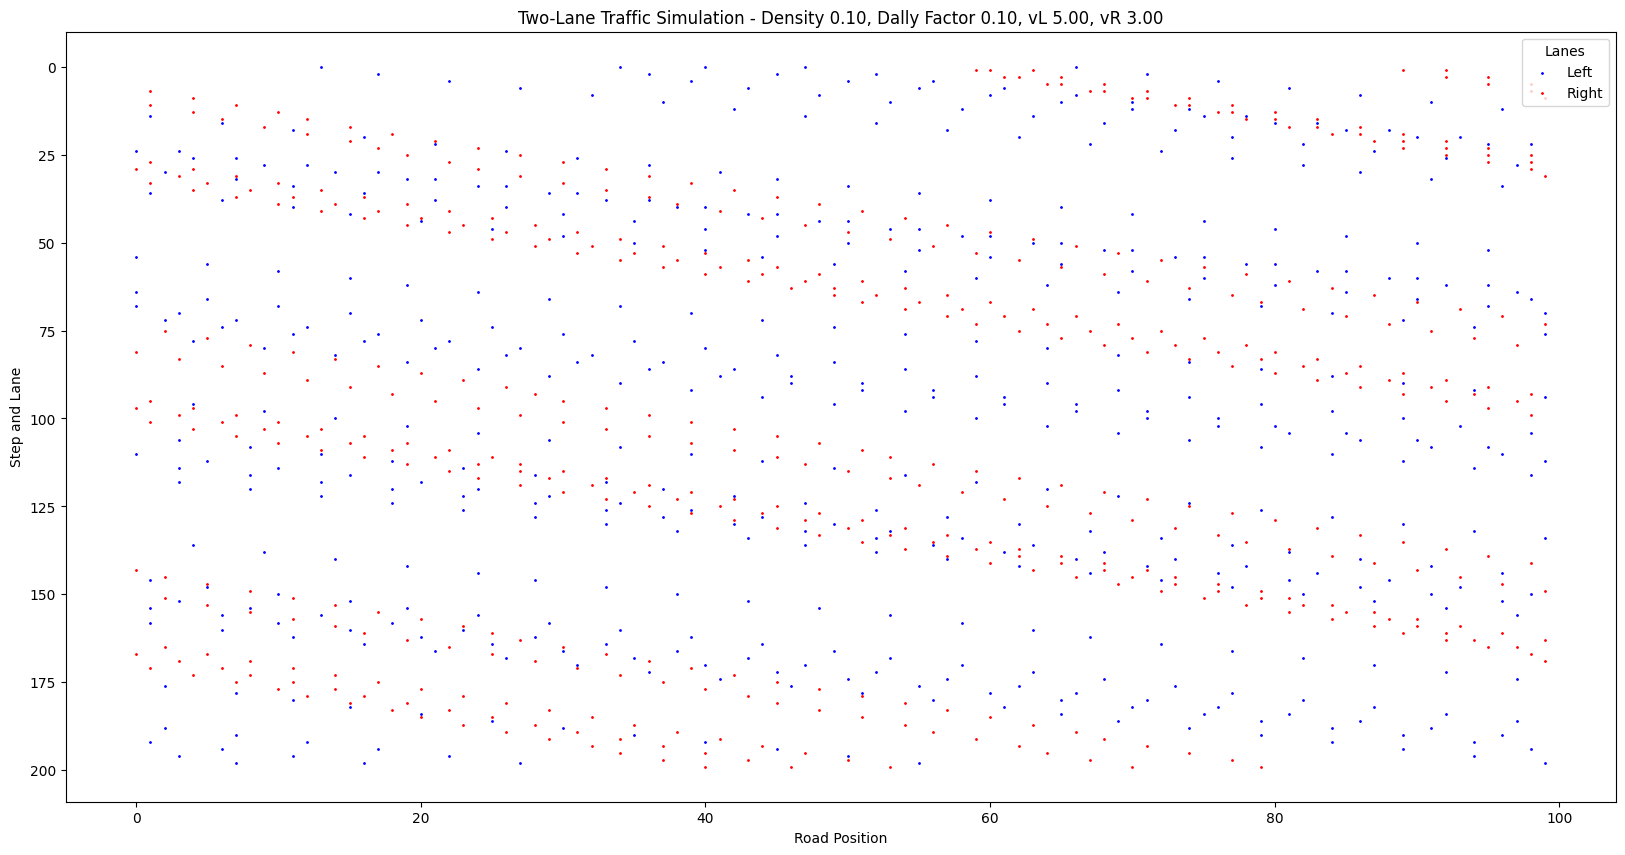

In [14]:
# Parameters for simulation
length = 100
vL = 5
vR = 3
density = 0.1
p = 0.1
num_steps = 100

# Initializing the simulation
simulation = TwoLaneTrafficSimulation(length, vL, vR, density)

# Running the simulation with a plot in the console
# for _ in range(num_steps):
#     simulation.update(p)
#     simulation.display()  # Optional: Display the road after every update

# plotting the simulation
simulation.run_simulation_with_plot(num_steps, p)

### Ideas for Verification/Validation & Experimentation: 

#### Validation: 
1. Create scenarios with known expected behaviors, such as a single car on the road, ensuring it reaches maximum speed.
2. Gradually add complexity, like two cars with one needing to change lanes, and check the lane-changing logic.
3. Run the simulation with a higher density and observe whether the traffic flow behavior matches real-world observations, such as faster flow in the left lane and occasional lane changes.

#### Experimentation: 
1. Vary the maximum speeds of both lanes and observe lane preference and flow rates.
2. Adjust the density and dally probability to see their impact on the number of lane changes and overall traffic flow.

In [8]:
def test_single_car_max_speed():
    '''
    Test case to check if 1 car per lane can reach
    the maximum speed in the simulation.
    '''
    length = 100
    vL = 5  # Maximum speed in the left lane
    num_steps = 10  # Enough steps to reach maximum speed
    density = 0.02  # Low enough density to ensure only one car in each lane
    p = 0  # No randomization for this test
    
    simulation = TwoLaneTrafficSimulation(length, vL, vL, density)
    num_cars = int(length * density)
    
    for _ in range(num_steps):
        simulation.update(p)
        # simulation.display()
    
    max_speed_reached = np.count_nonzero(simulation.road == vL) == num_cars
    assert max_speed_reached, "The cars have not reached the maximum speed."
    print(f"Test 1 Passed: The {num_cars} cars reached the maximum speed of {vL}.")

def test_lane_change_logic():
    length = 100
    vL = 5  # Max speed in the left lane
    vR = 3  # Max speed in the right lane is lower to encourage lane change
    density = 0.00  # will hardcode the car positions later
    p = 0  # No randomization for this test
    
    simulation = TwoLaneTrafficSimulation(length, vL, vR, density)
    
    # Directly place a faster car behind a slower one in the right lane to test lane change
    simulation.road[1, 1] = vR  # fast car at max speed for right lane
    simulation.road[1, 2] = 1  # slower car right in front
    
    for _ in range(2): simulation.update(p) 
    
    # If lane change logic works, the faster car should now be in the left lane
    lane_change_occurred = np.count_nonzero(simulation.road[0] > -1) == 1 and np.count_nonzero(simulation.road[1] > -1) == 1
    assert lane_change_occurred, "Lane change did not occur as expected."
    print("Test 2 Passed: Lane change logic works as expected.")

def test_high_density_behavior():
    length = 100
    vL = 6
    vR = 3
    density = 0.5  # High density
    p = 0.1  # Some randomization
    num_steps = 50
    
    simulation = TwoLaneTrafficSimulation(length, vL, vR, density)
    
    for _ in range(num_steps):
        simulation.update(p)
    
    # Expectation: Average speed in the left lane should be higher than in the right lane
    left_lane_avg_speed = np.mean(simulation.road[0][simulation.road[0] != -1])
    right_lane_avg_speed = np.mean(simulation.road[1][simulation.road[1] != -1])
    
    assert left_lane_avg_speed > right_lane_avg_speed, "Left lane flow not faster than right lane."
    print("Test 3 Passed: Higher density behavior matches expectations with faster flow in the left lane.")
    print(f"\taverage speed in left lane: {left_lane_avg_speed}")
    print(f"\taverage speed in right lane: {right_lane_avg_speed}")

In [9]:
test_single_car_max_speed()
test_lane_change_logic()
test_high_density_behavior()

Test 1 Passed: The 2 cars reached the maximum speed of 5.
Test 2 Passed: Lane change logic works as expected.
Test 3 Passed: Higher density behavior matches expectations with faster flow in the left lane.
	average speed in left lane: 2.4285714285714284
	average speed in right lane: 1.4285714285714286
